# Problem Statement

To buid a machine learning system that can predict what is the medical insurance cost of a person

# Work Flow

1. Data Collection -> Insurance Cost data based on some parameters such as what are the health issues that person is having and other such kind of things
2. Data Analysis -> to understand the insights of the data, what is this data all about and other such kind of things
3. Data Preprocessing -> make the data compatiable to go into Machine Learning model
4. Data splitting -> training data & test data
5. Model Selection -> Linear Regression Model
6. Trained Linear Regresssion Model
7. Testing the model -> using new data (test data)

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We are having 3 categorical features -> Sex, Smoker, region

In [5]:
# checking for missing values in the dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [6]:
# Statistical measures of the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


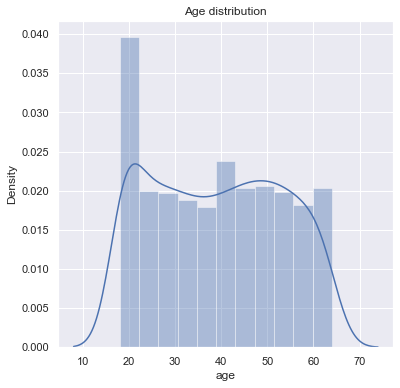

In [7]:
# distribution of Age values

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.age)
plt.title('Age distribution')
plt.show()

In [8]:
# distribution of Sex values

data.sex.value_counts().sort_index()

female    662
male      676
Name: sex, dtype: int64

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


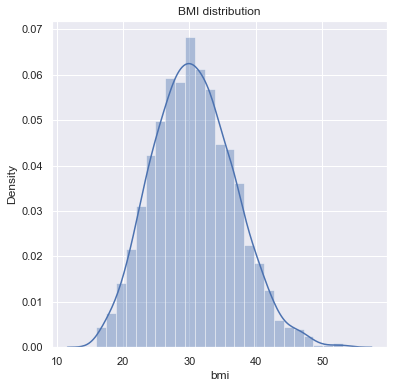

In [9]:
# distribution of bmi values

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.bmi)
plt.title('BMI distribution')
plt.show()

Normal BMI range -> 18.5 to 24.9

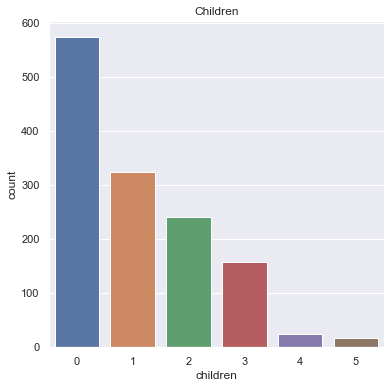

In [10]:
# distribution of children values

plt.figure(figsize=(6,6))
sb.countplot(x='children', data=data)
plt.title('Children')
plt.show()

In [11]:
data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

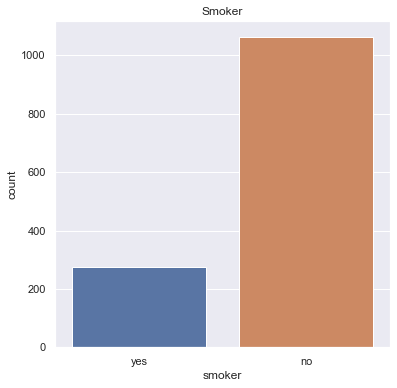

In [12]:
# distribution of smoker values

plt.figure(figsize=(6,6))
sb.countplot(x='smoker', data=data)
plt.title('Smoker')
plt.show()

In [13]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

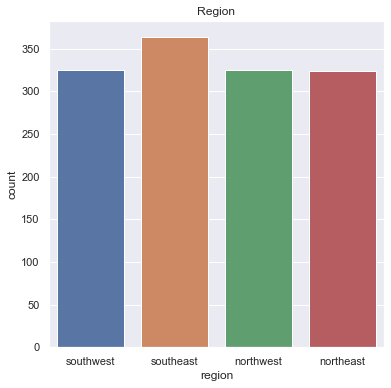

In [14]:
# distribution of region values

plt.figure(figsize=(6,6))
sb.countplot(x='region', data=data)
plt.title('Region')
plt.show()

In [15]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


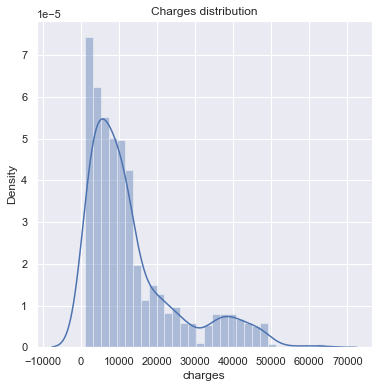

In [16]:
# distribution of charges values

plt.figure(figsize=(6,6))
sb.distplot(data.charges)
plt.title('Charges distribution')
plt.show()

# Data Preprocessing

In [17]:
# Encoding the Categorical Features

data.replace({'sex':{'male':0, 'female':1}}, inplace=True)
data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [18]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
5,31,1,25.740,0,1,0,3756.62160
6,46,1,33.440,1,1,0,8240.58960
7,37,1,27.740,3,1,3,7281.50560
8,37,0,29.830,2,1,2,6406.41070
9,60,1,25.840,0,1,3,28923.13692


In [19]:
# splitting features and target

x = data.iloc[:,:-1]
y = data.charges

In [20]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [21]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Data Splitting

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [23]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Linear Regression

**Model Building**

In [24]:
# loading the Linear Regression Model
model = LinearRegression().fit(x_train,y_train)

In [25]:
# Prediction on training data
train_data_pred = model.predict(x_train)

In [26]:
# R squared Value for trainig data
R_sq_train = metrics.r2_score(y_train, train_data_pred)
print(R_sq_train)

0.751505643411174


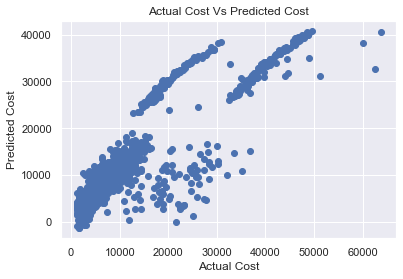

In [27]:
# visualizing the actual cost and predicted cost
plt.scatter(y_train, train_data_pred)
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Actual Cost Vs Predicted Cost')
plt.show()

Here, we can see that there is not much distance between the values. Most of the values are closer to each other. 

**Testing the model**

In [28]:
# Prediction on test data
test_data_pred = model.predict(x_test)

In [29]:
# R squared Value for test data
R_sq_test = metrics.r2_score(y_test, test_data_pred)
print(R_sq_test)

0.7447273869684077


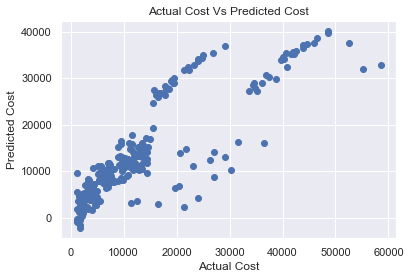

In [30]:
# visualizing the actual cost and predicted cost
plt.scatter(y_test, test_data_pred)
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Actual Cost Vs Predicted Cost')
plt.show()

# Building a predective system

In [31]:
# input data -> (31, female=1, 25.74, 0, no=1, southeast=0)
# output ->  3756.6216


input_data = (31, 1, 25.74, 0, 1, 0)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [32]:
prediction = model.predict(input_data_reshape)
print(prediction)

[3760.0805765]


In [33]:
# input data -> (43, male=0, 27.8, 0, yes=0, southwest=1)
# output ->  37829.7242


input_data = (43, 0, 27.8, 0, 0, 1)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [34]:
prediction = model.predict(input_data_reshape)
print(prediction)

[31572.28054367]


# Support Vector Machine Model Regressor

In [35]:
# Loading Support Vector Machine Model
from sklearn import svm

SVM_model = svm.SVR(kernel='linear').fit(x_train,y_train)

In [36]:
# Prediction on training data
SVM_train_data_pred = SVM_model.predict(x_train)

In [37]:
# R squared Value for trainig data
SVM_R_sq_train = metrics.r2_score(y_train, SVM_train_data_pred)
print(SVM_R_sq_train)

-0.1466513853398994


In [38]:
# Prediction on test data
SVM_test_data_pred = SVM_model.predict(x_test)

In [39]:
# R squared Value for test data
SVM_R_sq_test = metrics.r2_score(y_test, SVM_test_data_pred)
print(SVM_R_sq_test)

-0.09975846691765944


# Ridge Regression

In [40]:
# Loading Ridge regression Model
from sklearn.linear_model import Ridge

# loading the Model
Ridge_model = Ridge().fit(x_train,y_train)

In [41]:
# R squared Value for trainig data

Ridge_train_pred = Ridge_model.predict(x_train)
Ridge_R2_train = metrics.r2_score(y_train, Ridge_train_pred)
print(Ridge_R2_train)

0.7514846144151407


In [42]:
# R squared Value for test data

Ridge_test_pred = Ridge_model.predict(x_test)
Ridge_R2_test = metrics.r2_score(y_test, Ridge_test_pred)
print(Ridge_R2_test)

0.7448008334274916


# Lasso Regression

In [43]:
# Loading Lasso regression Model
from sklearn.linear_model import Lasso

# loading the Model
Lasso_model = Lasso().fit(x_train,y_train)

In [44]:
# R squared Value for trainig data

Lasso_train_pred = Lasso_model.predict(x_train)
Lasso_R2_train = metrics.r2_score(y_train, Lasso_train_pred)
print(Lasso_R2_train)

0.7515055550686265


In [45]:
# R squared Value for test data

Lasso_test_pred = Lasso_model.predict(x_test)
Lasso_R2_test = metrics.r2_score(y_test, Lasso_test_pred)
print(Lasso_R2_test)

0.7447245444913575


# Comaprison

Decreasing order of accuracy is depicted as:
- Ridge Regression - 0.7448
- Linear Regression - 0.7447
- Lasso Regression - 0.7447
- SVM Regressor - -0.09

The results are highly clear that all the models except SVM Regressor are good in predicting the medical insurance costs. The model that can't be used for this cost prediction is SVM because of its small expansion. SVM can't have the ability to handle huge data. Linear Regression will generally fit traning data much better and performs well even with the presence of irrelevant features and is relatively unaffected by them.